# INM427 Neural Computing
## Group work
Supanut Sookkho (MSc Data Science / 230024841) & Yumi Heo (Msc Data Science / 230003122)

In [1]:
# Import the relevant libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import random

In [2]:
# Generate random numbers.


random.seed(123)

In [3]:
# The dataset is from Kaggle, and this dataset is about whether a customer will keep their bank account or not.
# Dataset URL: https://www.kaggle.com/competitions/playground-series-s4e1

# We use only the train set in Kaggle
# since the test set does not have their target data(the column name with 'Exited') due to the competition.
# We renamed the file of the train set into 'bank_churn_data.csv'.


df = pd.read_csv('bank_churn_data.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


# Data wrangling

In [4]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check the number of values in 'Gender' and 'Geography'.

print(df['Gender'].nunique())
print(df['Geography'].nunique())

2
3


In [7]:
# Remove irrelevant features for a model.

df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [8]:
# Change the string data to numeric one in 'Gender'.

map_dict = {'Female' : 0, 'Male' : 1}
df['Gender'] = df['Gender'].map(map_dict).astype(int)

In [9]:
df['Gender'].value_counts()

1    93150
0    71884
Name: Gender, dtype: int64

In [10]:
df['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [11]:
# Change the string data to numeric one in 'Geography'.

map_dict = {'France' : 0, 'Spain' : 1, 'Germany' : 2}
df['Geography'] = df['Geography'].map(map_dict).astype(int)

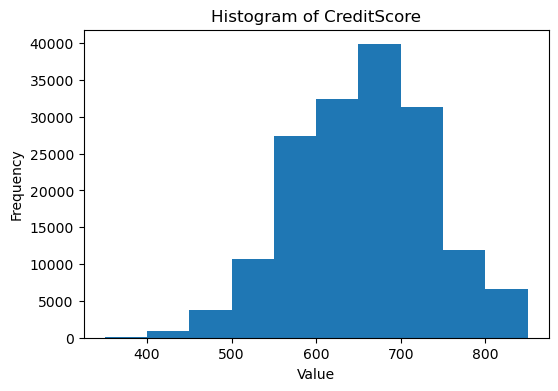

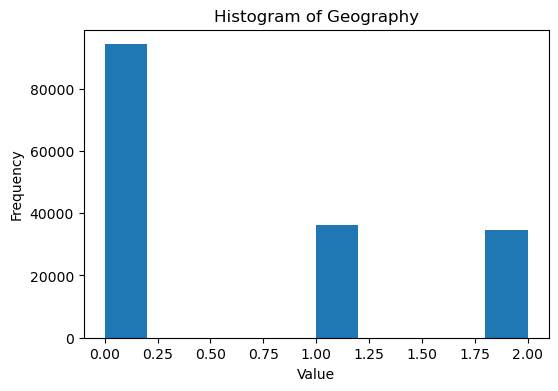

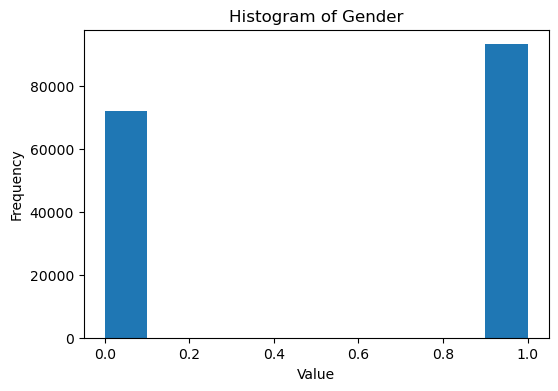

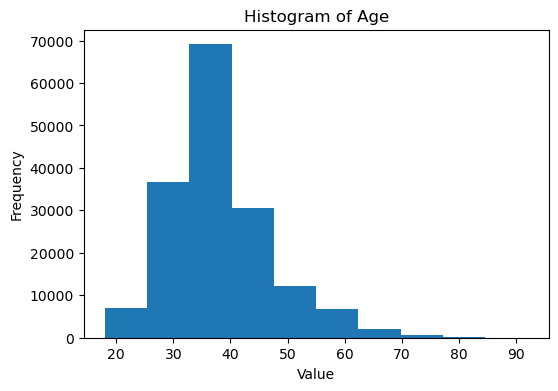

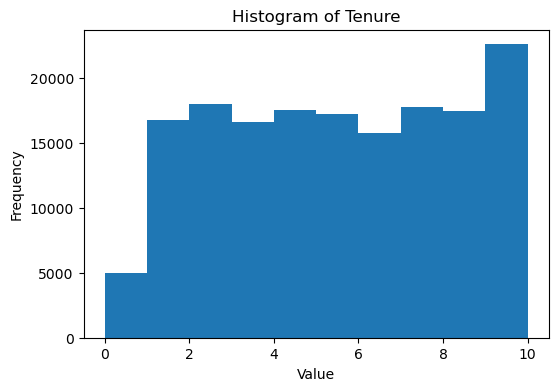

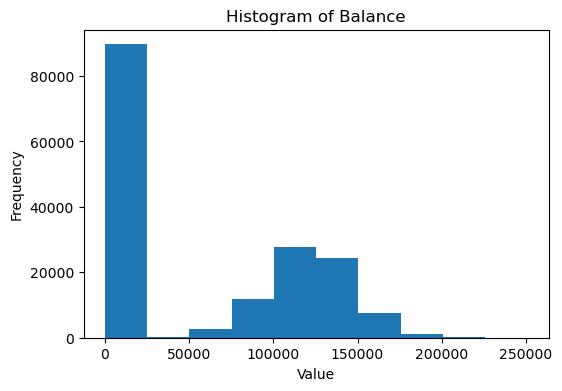

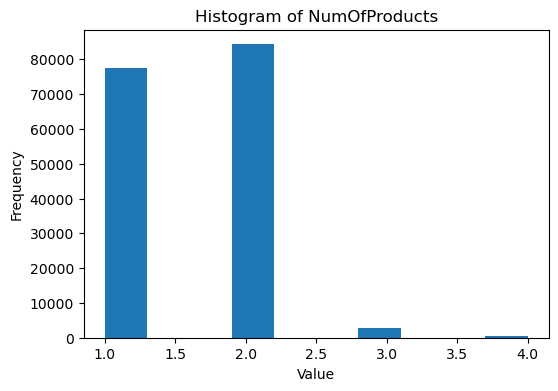

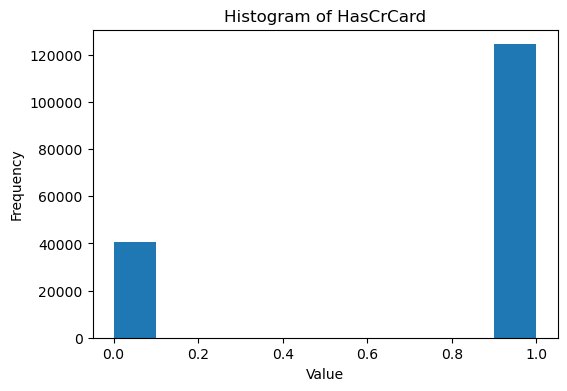

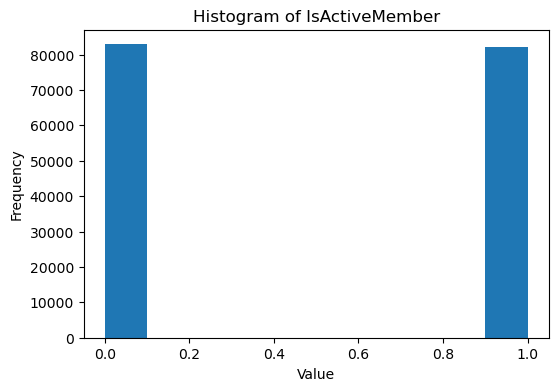

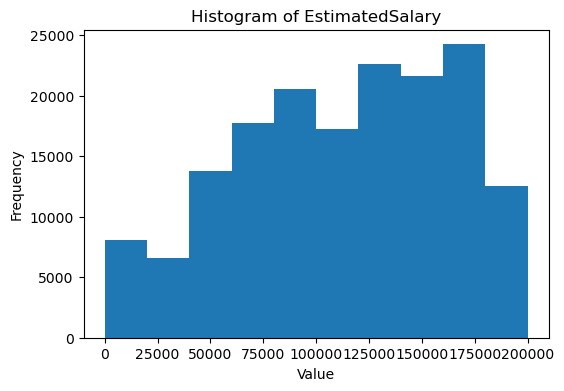

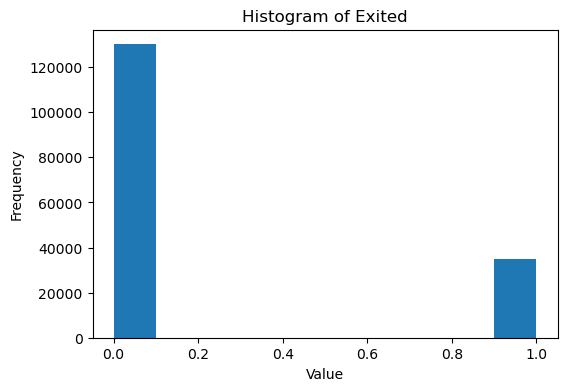

In [12]:
# Check each distribution.

for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [13]:
# There is a large proportion of the 'Balance' being 0.
# We will determine whether to remove the data with 0 in 'Balance'
# by conducting statistical analysis on the 'Balance'
# and rechecking the distribution of the other features and 'Exited'(target) that appear when the balance is 0.

df['Balance'].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

In [14]:
df['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

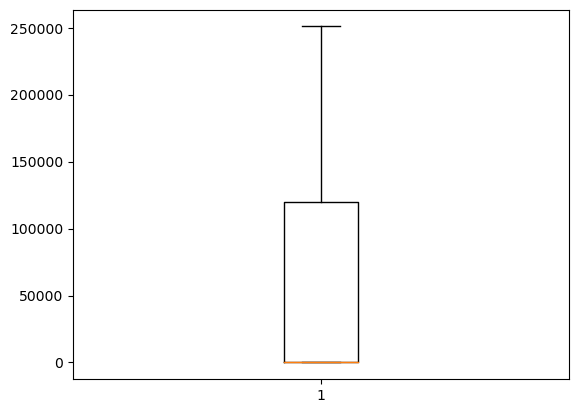

In [15]:
plt.boxplot(df['Balance']);

In [16]:
# Select the data with 0 in 'Balance'.

df_0_balance = df[df['Balance'] == 0]
df_0_balance

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1,0,181449.97,0
1,627,0,1,33.0,1,0.0,2,1,1,49503.50,0
2,678,0,1,40.0,10,0.0,2,1,0,184866.69,0
4,716,1,1,33.0,5,0.0,2,1,1,15068.83,0
8,676,0,1,43.0,4,0.0,2,1,0,142917.13,0
...,...,...,...,...,...,...,...,...,...,...,...
165028,630,0,1,50.0,8,0.0,2,1,1,5962.50,0
165029,667,1,0,33.0,2,0.0,1,1,1,131834.75,0
165030,792,0,1,35.0,3,0.0,1,0,0,131834.45,0
165031,565,0,1,31.0,5,0.0,1,1,1,127429.56,0


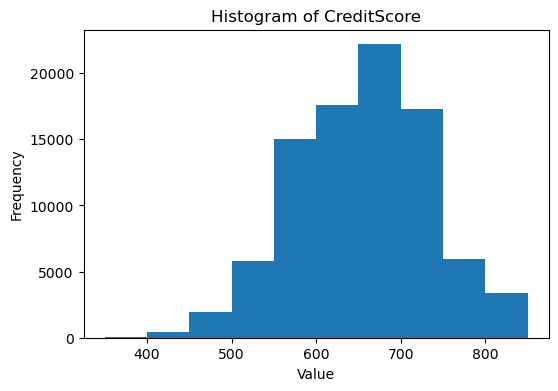

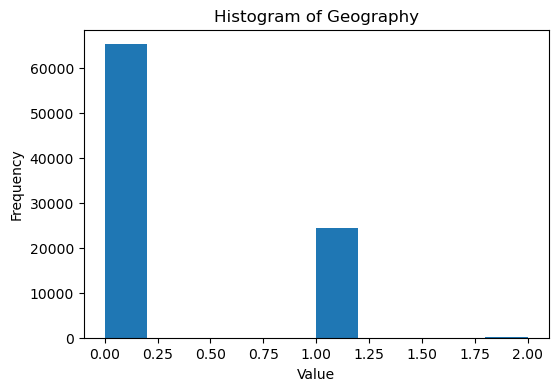

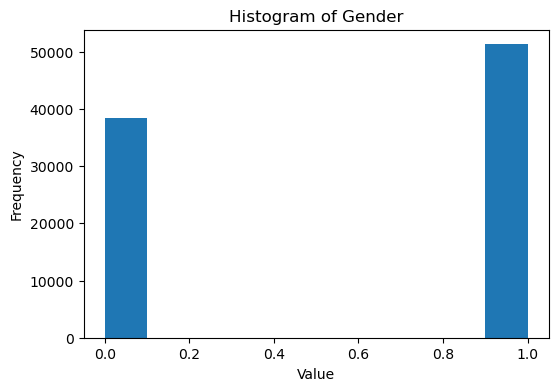

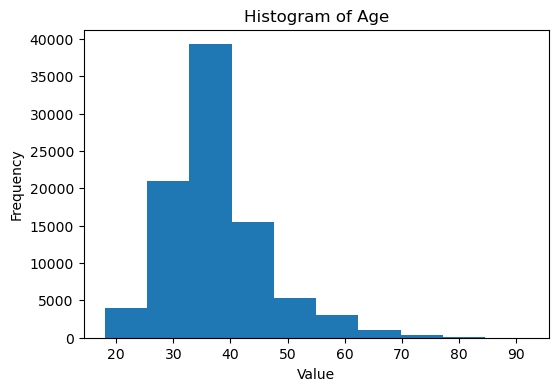

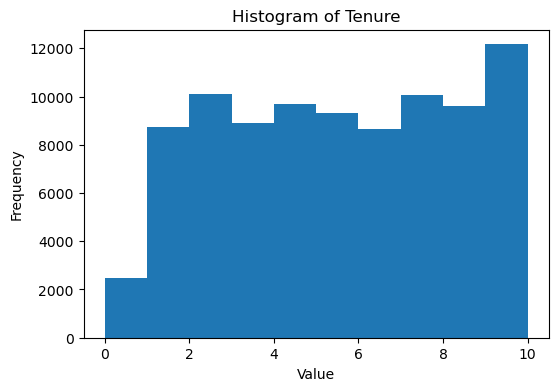

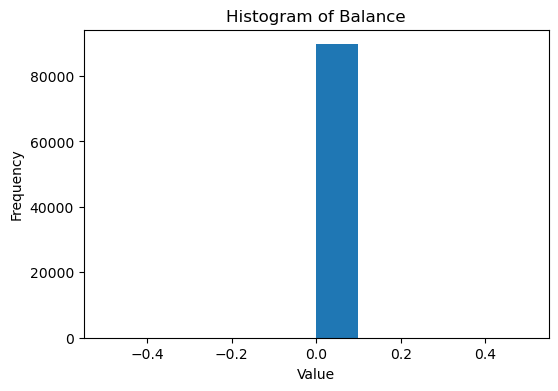

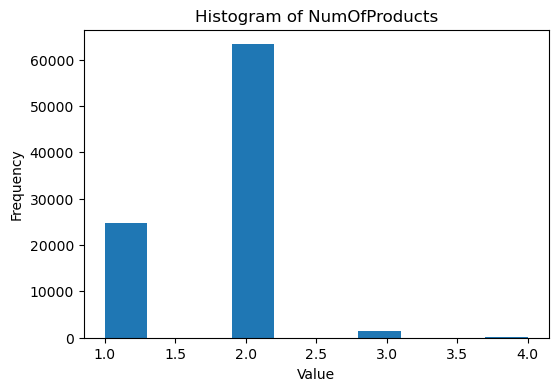

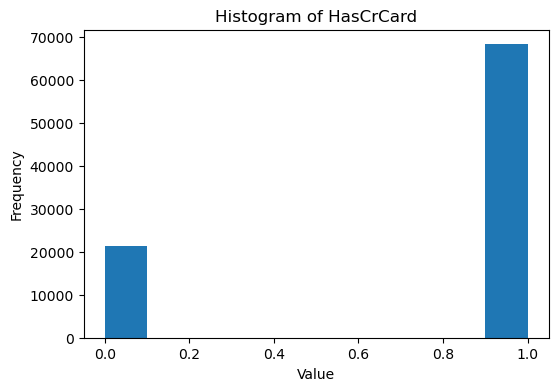

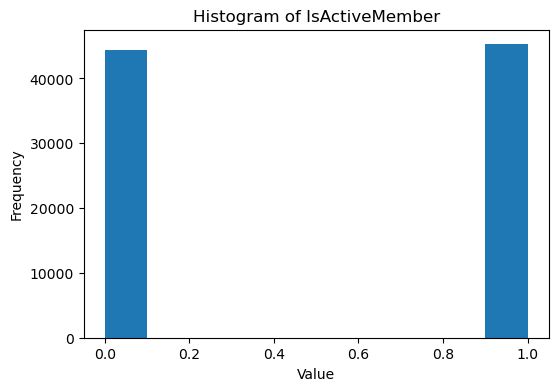

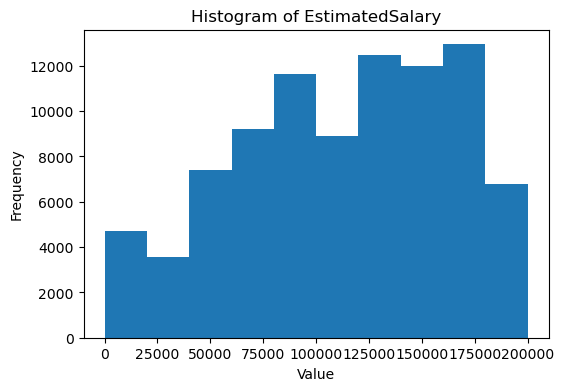

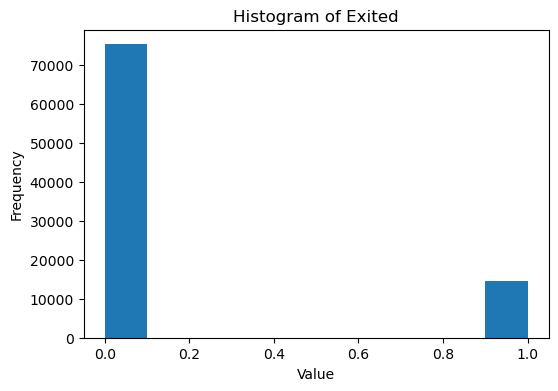

In [17]:
# Check each distribution of the features in 'df_0_balance'.

for column in df_0_balance.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_0_balance[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

<Axes: title={'center': 'CreditScore'}, ylabel='Frequency'>

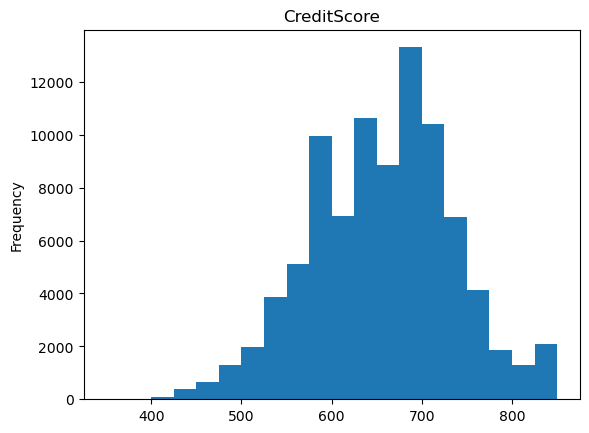

In [18]:
df_0_balance['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')

<Axes: title={'center': 'Exited'}, ylabel='Frequency'>

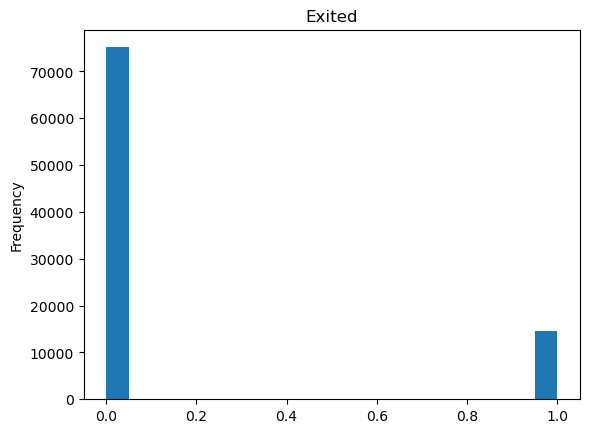

In [19]:
df_0_balance['Exited'].plot(kind='hist', bins=20, title='Exited')

<Axes: >

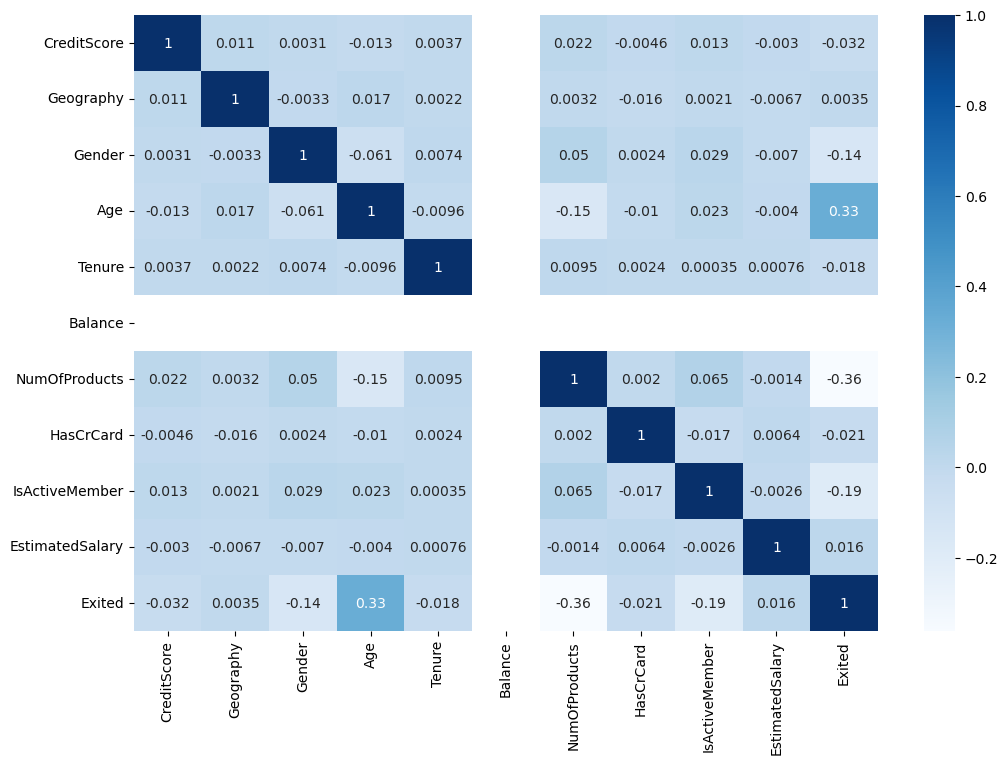

In [20]:
# Check the correlation coefficient of each feature.

correlation_matrix = df_0_balance.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)

The data with the value of 0 in 'Balance' will be remained since 'Balance' has considerably low collinearity with 'Exited'.
Although, it looks problematic as the quantile range of 'Balance' shows 0 in 25% and 0 in 50%, the data with 0 in 'Balance' is still meaningful as it shows a similar distribution of the features to the distribution in the data with 0 and the other values in 'Balance'.

# Split the data set

In [21]:
# Split the dataset into features and the target.
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
print(X)
print(y)

        CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       1  33.0       3       0.00   
1               627          0       1  33.0       1       0.00   
2               678          0       1  40.0      10       0.00   
3               581          0       1  34.0       2  148882.54   
4               716          1       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          1       0  33.0       2       0.00   
165030          792          0       1  35.0       3       0.00   
165031          565          0       1  31.0       5       0.00   
165032          554          1       0  30.0       7  161533.00   
165033          850          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                   2          1               0        181449.97  
1                   2          1               1         49

In [22]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(165034, 10)
(165034,)


In [23]:
# Convert Pandas to Numpy array.
X = X.values
y = y.values

print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(165034, 10)
(165034,)


In [24]:
# Convert Numpy array to Tensor.
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([165034, 10])
torch.Size([165034])


In [25]:
# Set the number of random state to shuffle the data.
random_state = 123

# Split the training set into 70% and testing set into 30%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_state
)

# Check the data type.
print(X_train.dtype)

# Split the testing set into validation (50%) and test (50%).
X_test, X_vali, y_test, y_vali = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)


torch.float32


In [26]:
# Check the dimensionality and data type of each set.
print("Training dataset")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Validation dataset")
print(X_vali.dtype, X_vali.shape)
print(y_vali.dtype, y_vali.shape)

print("Testing dataset")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training dataset
torch.float32 torch.Size([115523, 10])
torch.float32 torch.Size([115523])
Validation dataset
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing dataset
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


In [27]:
# Import SMOTE to balance the target in training set.
from imblearn.over_sampling import SMOTE

# Create a variable for SMOTE
smote = SMOTE(random_state=random_state)

# Resampling the X and y in the training set using SMOTE.
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [28]:
# Check the dimensionality and data type of each set.
print("Training dataset")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Training dataset (Smote)")
print(X_train_smote.dtype, X_train_smote.shape)
print(y_train_smote.dtype, y_train_smote.shape)

print("Validation dataset")
print(X_vali.dtype, X_vali.shape)
print(y_vali.dtype, y_vali.shape)

print("Testing dataset")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training dataset
torch.float32 torch.Size([115523, 10])
torch.float32 torch.Size([115523])
Training dataset (Smote)
float32 (182382, 10)
float32 (182382,)
Validation dataset
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing dataset
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


# Data scaling

In [29]:
# Normalise the features in each set.
from sklearn.preprocessing import MinMaxScaler
normal_scaler = MinMaxScaler()

X_train_smote_normalized = normal_scaler.fit_transform(X_train_smote)
X_vali_normalized = normal_scaler.transform(X_vali)
X_test_normalized = normal_scaler.transform(X_test)

In [30]:
# Convert to Tensor and rename the variables for the features in each set.
X_train = X_train_smote_normalized = torch.tensor(X_train_smote_normalized, dtype=torch.float32)
X_vali = X_vali_normalized = torch.tensor(X_vali_normalized, dtype=torch.float32)
X_test = X_test_normalized = torch.tensor(X_test_normalized, dtype=torch.float32)

# Rename y_train_smote to y_train.
y_train = torch.tensor(y_train_smote, dtype=torch.float32)

In [31]:
# Check the size and type of datasets after the splitting

print("Training dataset (Smote)")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Validation dataset")
print(X_vali.dtype, X_vali.shape)
print(y_vali.dtype, y_vali.shape)

print("Testing dataset")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training dataset (Smote)
torch.float32 torch.Size([182382, 10])
torch.float32 torch.Size([182382])
Validation dataset
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing dataset
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


In [32]:
# Increase the dimension of all target variables.
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)
y_vali = y_vali.unsqueeze(1)

# Make sure that the data type and dimension of each set are all clear.
print("Training dataset")
print(X_train.dtype, X_train.shape, type(X_train))
print(y_train.dtype, y_train.shape, type(y_train))

print("Validation dataset")
print(X_vali.dtype, X_vali.shape, type(X_vali))
print(y_vali.dtype, y_vali.shape, type(y_vali))

print("Testing dataset")
print(X_test.dtype, X_test.shape, type(X_train))
print(y_test.dtype, y_test.shape, type(y_train))

Training dataset
torch.float32 torch.Size([182382, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([182382, 1]) <class 'torch.Tensor'>
Validation dataset
torch.float32 torch.Size([24756, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24756, 1]) <class 'torch.Tensor'>
Testing dataset
torch.float32 torch.Size([24755, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24755, 1]) <class 'torch.Tensor'>


In [33]:
# To ensure a fair comparison between Python and Matlab,
# we use the same split datasets to train, validate, and test a model in both environments.
# Tensors are converted into CSV files for application in Matlab.
# After conversion, the following codes are commented out.

# Convert the datasets from Tensor to Numpy
#X_train_ndarray = X_train.numpy()
#X_test_ndarray = X_test.numpy()
#X_vali_ndarray = X_vali.numpy()
#y_train_ndarray = y_train.numpy()
#y_test_ndarray = y_test.numpy()
#y_vali_ndarray = y_vali.numpy()

# Save all datasets to CSV file
#np.savetxt('X_train_ndarray.csv', X_train_ndarray, delimiter=',')
#np.savetxt('X_test_ndarray.csv', X_test_ndarray, delimiter=',')
#np.savetxt('X_vali_ndarray.csv', X_vali_ndarray, delimiter=',')
#np.savetxt('y_train_ndarray.csv', y_train_ndarray, delimiter=',')
#np.savetxt('y_test_ndarray.csv', y_test_ndarray, delimiter=',')
#np.savetxt('y_vali_ndarray.csv', y_vali_ndarray, delimiter=',')

# Build a neural network model

In [34]:
# Define the structure of the neural network model.
input_features = 10
output_features = 1

# Set the list of hyperparameters for grid search.
learning_rates_grid = [0.01, 0.1, 0.2, 0.3]
hidden_neurons_grid = [10, 25, 50, 100, 200]

# Set the number of epochs.
number_of_epochs = 1000

# Define variables to store the item from the result of the model.
best_accuracy = 0.0
best_hyperparameters = {}

# Make empty lists to store the result of every combination of hyperparameters for visualisation.
learning_rates_list_heatmap = []
hidden_neurons_list_heatmap = []
accuracy_list_heatmap = []

# Make an empty list to store the elapsed time from 1000 epochs of the best model.
import time
python_training_time_bestmodel = []

In [35]:
# Make the class for the neural network model.
class Credit_Churn_NN_Model(nn.Module):
    def __init__(self, input_features, hidden_neurons, output_features):
        super(Credit_Churn_NN_Model, self).__init__()
        self.fc1 = nn.Linear(input_features, hidden_neurons)
        self.fc2 = nn.Linear(hidden_neurons, output_features)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        output_layer1 = self.fc1(x)
        l1_activated = self.relu(output_layer1)
        output_layer2 = self.fc2(l1_activated)
        output_activated = self.sigmoid(output_layer2)
        return output_activated


In [36]:
# Make the function to train the model.
def train_NN_model(learning_rate, hidden_neurons, X_train, y_train, X_vali, y_vali, number_of_epochs):
    model = Credit_Churn_NN_Model(input_features, hidden_neurons, output_features)
    criterion = torch.nn.BCELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Make lists to store the item from the loss and elapsed time in order to plot a graph.
    plot_train_loss = []
    plot_vali_loss = []
    plot_train_time = []

    # Iterate the model following each epoch.
    for e in range(number_of_epochs):
        # Train the model.
        model.train()
        # Start the timer.
        start_time = time.time()
        # Make the gradient descent start from 0
        optimizer.zero_grad()
        y_train_pred = model(X_train)
        # Call the loss function.
        train_loss = criterion(y_train_pred, y_train)
        # Implement backpropagation.
        train_loss.backward()
        optimizer.step()
        # Stop the timer.
        end_time = time.time()
        # Calculate the elapsed time.
        Total_time = end_time - start_time
        plot_train_time.append(Total_time)
        # Append the loss value from training to the following list.
        plot_train_loss.append(train_loss)

        # Validate the model.
        model.eval()
        with torch.no_grad():
            y_vali_pred = model(X_vali)
            vali_loss = criterion(y_vali_pred, y_vali)
            # Append the loss value from validation to the following list.
            plot_vali_loss.append(vali_loss)
    
    return model, plot_train_loss, plot_vali_loss, plot_train_time

# Train the model with grid search

In [37]:
# Define an empty list to store the training time from the best model.
Total_time = []

# Apply a nested loop for grid search.
for learning_rate in learning_rates_grid:
    for hidden_neurons in hidden_neurons_grid:
        print(f"\nTraining the NNet model with learning rate={learning_rate} and hidden_neurons={hidden_neurons}")
        # Call the function to train and evaluate the model with the nested loop.
        trained_model, train_loss, vali_loss, train_time = train_NN_model(learning_rate, hidden_neurons,
                                                                          X_train, y_train,
                                                                          X_vali, y_vali,
                                                                          number_of_epochs)                               
                            
        # Get the predictions from the X_val, and convert them to either 1 or 0.
        y_vali_pred = (trained_model(X_vali).detach().numpy() > 0.5).astype(int)
        # Calculate the validation accuracy.
        accuracy_validation_set = (y_vali_pred == y_vali.numpy()).mean()
        print("The validation accuracy = %.2f%%" % (accuracy_validation_set*100))
        
        # Append each value to the list for plotting.
        learning_rates_list_heatmap.append(learning_rate)
        hidden_neurons_list_heatmap.append(hidden_neurons)
        accuracy_list_heatmap.append(accuracy_validation_set)
        Total_time.append(train_time)
        
        # Pick the best model comparing the validation accuracy from each model.
        if accuracy_validation_set > best_accuracy: # If it is so,
            best_accuracy = accuracy_validation_set # Reassign the validation accuracy to the variable of 'best_accuracy'.
            # Define the best hyperparameters with the selected learning rate and the number of neurons.
            best_hyperparameters = {'learning_rate': learning_rate, 'hidden_neurons': hidden_neurons}
            # Pick the value of the loss and training time from the best model.
            train_loss_for_plotting = train_loss
            vali_loss_for_plotting = vali_loss
            python_training_time_bestmodel = train_time
            # Replace the model with the best model.
            best_model = trained_model

# Print the best hyperparameters from grid search.
print("\nThe Best Hyperparameters are ", best_hyperparameters)


Training the NNet model with learning rate=0.01 and hidden_neurons=10
The validation accuracy = 67.73%

Training the NNet model with learning rate=0.01 and hidden_neurons=25
The validation accuracy = 68.15%

Training the NNet model with learning rate=0.01 and hidden_neurons=50
The validation accuracy = 69.98%

Training the NNet model with learning rate=0.01 and hidden_neurons=100
The validation accuracy = 68.22%

Training the NNet model with learning rate=0.01 and hidden_neurons=200
The validation accuracy = 68.61%

Training the NNet model with learning rate=0.1 and hidden_neurons=10
The validation accuracy = 74.89%

Training the NNet model with learning rate=0.1 and hidden_neurons=25
The validation accuracy = 74.89%

Training the NNet model with learning rate=0.1 and hidden_neurons=50
The validation accuracy = 75.10%

Training the NNet model with learning rate=0.1 and hidden_neurons=100
The validation accuracy = 75.18%

Training the NNet model with learning rate=0.1 and hidden_neuron

In [38]:
# Check the best combination of hyperparameters.
print(best_hyperparameters)

best_learning_rate = best_hyperparameters['learning_rate']
best_hidden_neurons = best_hyperparameters['hidden_neurons']

print(best_learning_rate)
print(best_hidden_neurons)

{'learning_rate': 0.2, 'hidden_neurons': 200}
0.2
200


In [39]:
# Check the loss values from the best model.
train_loss_for_plotting

[tensor(0.7019, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6946, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6899, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6858, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6819, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6783, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6748, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6714, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6682, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6652, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6622, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6593, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6566, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6540, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6514, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6490, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6466, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6443, grad_fn=<BinaryCrossEntropyBackw

In [40]:
# Convert from Tensor to list to plot using seaborn.
train_loss_for_plotting = [tensor_item.item() for tensor_item in train_loss_for_plotting]
vali_loss_for_plotting = [tensor_item.item() for tensor_item in vali_loss_for_plotting]
print(type(train_loss_for_plotting))
print(type(vali_loss_for_plotting))

# Create a numpy list for epochs which starts from 1 and ends with  1000.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)

<class 'list'>
<class 'list'>


numpy.ndarray

# Model evaluation

In [41]:
# Import the recorded performance from MATLAB to plot in Python.
import csv
with open('matlab_training_time_bestmodel.csv', 'r') as file1:
    reader1 = csv.reader(file1)
    matlab_training_time_bestmodel = np.array(list(reader1), dtype=float)

with open('matlab_train_loss_for_plotting.csv', 'r') as file2:
    reader2 = csv.reader(file2)
    matlab_train_loss_for_plotting = np.array(list(reader2), dtype=float)
    
with open('matlab_vali_loss_for_plotting.csv', 'r') as file3:
    reader3 = csv.reader(file3)
    matlab_vali_loss_for_plotting = np.array(list(reader3), dtype=float)


In [42]:
# Change the nested list to flat lists
matlab_training_time_bestmodel = matlab_training_time_bestmodel.tolist()[0]
matlab_train_loss_for_plotting = matlab_train_loss_for_plotting.tolist()[0]
matlab_vali_loss_for_plotting = matlab_vali_loss_for_plotting.tolist()[0]

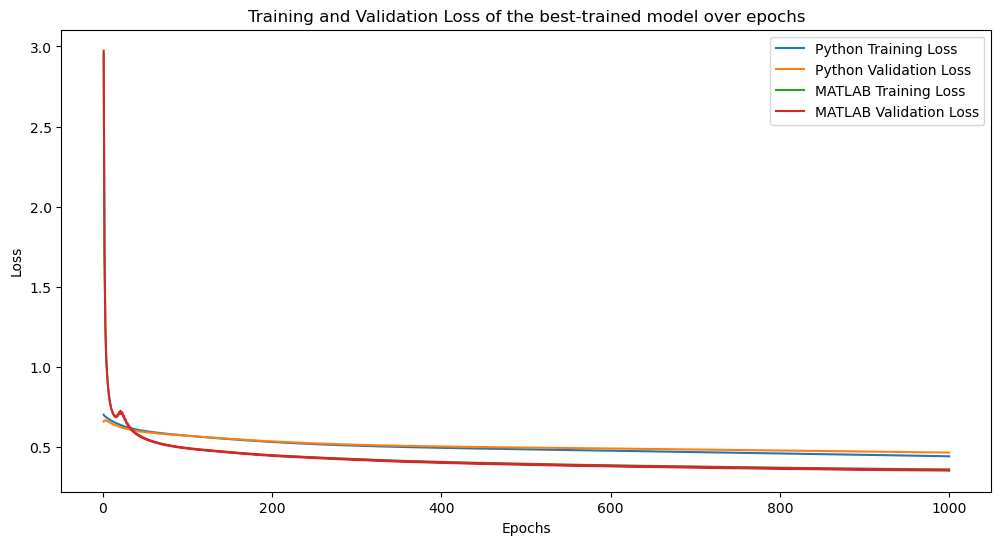

In [43]:
# Plot the training time of the model in Python and that of the model in MATLAB.
fig = plt.figure(figsize=(12, 6))
plt.plot(Epochs, train_loss_for_plotting, label='Python Training Loss')
plt.plot(Epochs, vali_loss_for_plotting, label='Python Validation Loss')
plt.plot(Epochs, matlab_train_loss_for_plotting, label='MATLAB Training Loss')
plt.plot(Epochs, matlab_vali_loss_for_plotting, label='MATLAB Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss of the best-trained model over epochs')
plt.show()

In [44]:
# Since the value in the training time is continuous, it needs to be changed cumulatively.
python_training_time_bestmodel = np.cumsum(python_training_time_bestmodel)

len(python_training_time_bestmodel)

1000

In [45]:
python_training_time_bestmodel

array([   1.30332232,    2.58863735,    3.87094259,    5.15135574,
          6.43319321,    7.71303678,    9.00332785,   10.30966806,
         11.60496116,   12.87815285,   14.1724906 ,   15.41177082,
         16.70859504,   18.00489402,   19.30119109,   20.58648157,
         21.89680195,   23.18409252,   24.45637965,   25.72119737,
         26.98779511,   28.27513671,   29.58646774,   30.86280274,
         32.15514207,   33.44148135,   34.71978021,   36.00225878,
         37.29054976,   38.5690825 ,   39.85237122,   41.14368916,
         42.4139843 ,   43.70027518,   44.98661113,   46.24287534,
         47.52716565,   48.80245376,   50.15575957,   51.47508287,
         52.81146789,   54.11478496,   55.37011647,   56.65747929,
         57.94228029,   59.2300787 ,   60.50839996,   61.82270074,
         63.10899854,   64.41471553,   65.68045616,   66.93678594,
         68.24160409,   69.52590156,   70.81225491,   72.09055018,
         73.40192986,   74.67630863,   75.93059301,   77.22088

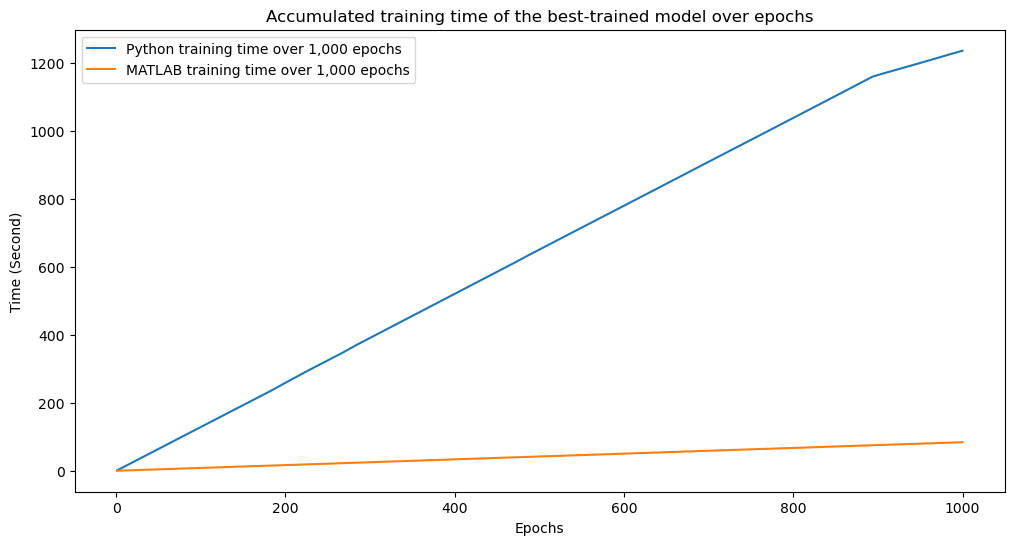

In [46]:
# Plot the loss of the model in Python and that of the model in MATLAB.
fig = plt.figure(figsize=(12, 6))
plt.plot(Epochs, python_training_time_bestmodel, label='Python training time over 1,000 epochs')
plt.plot(Epochs, matlab_training_time_bestmodel, label='MATLAB training time over 1,000 epochs')
plt.xlabel('Epochs')
plt.ylabel('Time (Second)')
plt.legend()
plt.title('Accumulated training time of the best-trained model over epochs')
plt.show()

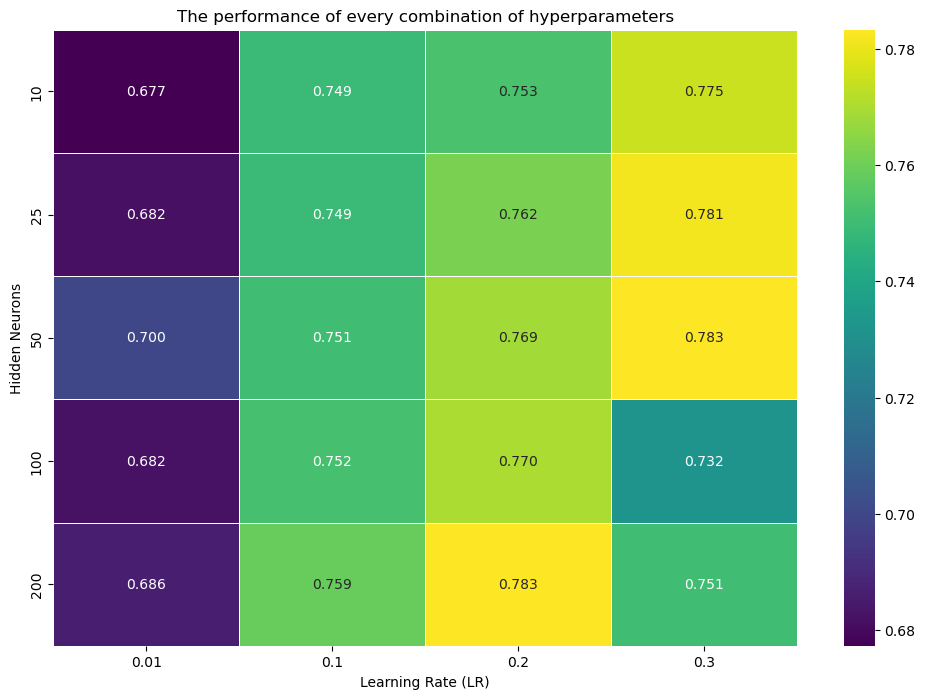

In [47]:
# Combine the lists into a DataFrame
df_for_heatmap = pd.DataFrame({'Learning Rate': learning_rates_list_heatmap, 'Hidden Neurons': hidden_neurons_list_heatmap, 'Accuracy': accuracy_list_heatmap})

# Make a pivot table from the DataFrame to create a matrix which is suitable for a heatmap.
pivoted_heatmap_data = df_for_heatmap.pivot('Hidden Neurons', 'Learning Rate', 'Accuracy')

# Create a heatmap using seaborn.
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_heatmap_data, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('The performance of every combination of hyperparameters')
plt.xlabel('Learning Rate (LR)')
plt.ylabel('Hidden Neurons')
plt.show()


In [53]:
# Evaluate the model in Python with the testing set.
best_model.eval()

# Change the predictions into 0 or 1.
y_test_pred =  best_model(X_test)
y_test_pred = y_test_pred.round()

# Calculate the accuracy rate.
accuracy_rate_test_set = (y_test_pred == y_test).float().mean()
accuracy_rate_test_set = float(accuracy_rate_test_set)
accuracy_rate_test_set_python = accuracy_rate_test_set * 100
print("The test accuracy for the best-trained model in Python  =  %.2f%%" % (accuracy_rate_test_set_python))

The test accuracy for the best-trained model in Python  =  78.22%


In [54]:
# The accuracy rate of the model in MATLAB.
# This number is derived from MATLAB.
accuracy_rate_test_set_MATLAB = 85.34
print("The test accuracy for the best-trained model in MATLAB  =  %.2f%%" % (accuracy_rate_test_set_MATLAB))

The test accuracy for the best-trained model in MATLAB  =  85.34%


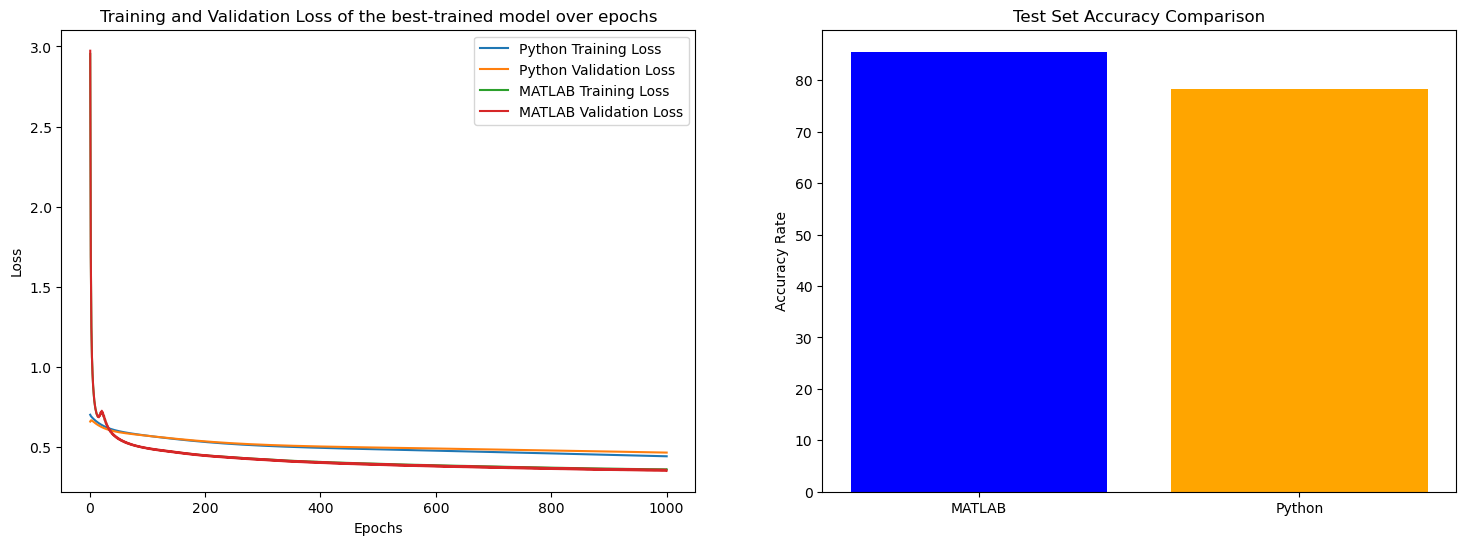

In [50]:
# Make one figure for two graphs.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Line chart about the training loss from the best model in Python and MATLAB.
ax1.plot(Epochs, train_loss_for_plotting, label='Python Training Loss')
ax1.plot(Epochs, vali_loss_for_plotting, label='Python Validation Loss')
ax1.plot(Epochs, matlab_train_loss_for_plotting, label='MATLAB Training Loss')
ax1.plot(Epochs, matlab_vali_loss_for_plotting, label='MATLAB Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_title('Training and Validation Loss of the best-trained model over epochs')

# Bar graph about the accuracy from the best model in Python and MATLAB.
accuracy_labels = ['MATLAB', 'Python']
accuracy_values = [accuracy_rate_test_set_MATLAB, accuracy_rate_test_set_python]
ax2.bar(accuracy_labels, accuracy_values, color=['blue', 'orange'])
ax2.set_ylabel('Accuracy Rate')
ax2.set_title('Test Set Accuracy Comparison')

plt.show()

In [51]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
TP = ((y_test_pred.round() == 1) & (y_test == 1)).sum().item()
TN = ((y_test_pred.round() == 0) & (y_test == 0)).sum().item()
FP = ((y_test_pred.round() == 1) & (y_test == 0)).sum().item()
FN = ((y_test_pred.round() == 0) & (y_test == 1)).sum().item()

# Calculate the confusion matrix.
# Apart from the accuracy rate, measure Precision, Recall, and F1 score.
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Precision of the best-trained model = %.2f%%" % (precision*100))
print("Recall of best-trained model = %.2f%%" % (recall*100))
print("F1 score of best-trained model = %.2f%%" % (f1*100))

Precision of the best-trained model = 48.78%
Recall of best-trained model = 69.30%
F1 score of best-trained model = 57.26%
